In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

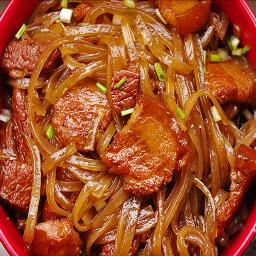

In [ ]:
img = cv2.imread("/content/1_1.jpg")
cv2_imshow(img)

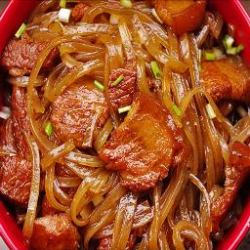

In [ ]:
re_image = cv2.resize(img, (250,250))
cv2_imshow(re_image)

In [ ]:
def grey_world(re_image):
    alpha , beta, gamma = 1,1,1

    b, g, r = cv2.split(re_image)                    # split into red green and blue channels
    sumB = np.sum(b)
    sumG = np.sum(g)
    sumR = np.sum(r)
    n = np.ma.size(b)                           # no of elements - will be same for all channels

    #calculate averages
    avgB = (sumB/n)
    avgG = (sumG/n)
    avgR = (sumR/n)

    scale = float((avgB + avgG + avgR))/3.0

    denB = float(avgB) * gamma
    denG = float(avgG) * beta
    denR = float(avgR) * alpha

    blue = np.divide((np.multiply(b,scale)), denB)
    green = np.divide((np.multiply(g,scale)), denG)
    red = np.divide((np.multiply(r,scale)), denR)

    blue = np.array(blue, dtype= np.uint8)
    green = np.array(green, dtype= np.uint8)
    red = np.array(red, dtype= np.uint8)

    merged = cv2.merge((blue,green,red))
    return merged

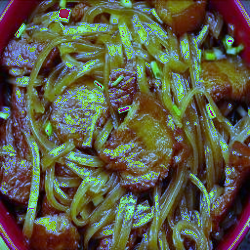

In [ ]:
 Img_Grey = grey_world(re_image)
 window_name = 'image'
 cv2_imshow(Img_Grey)

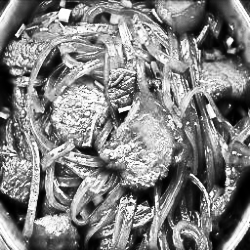

In [ ]:
b,g,r = cv2.split(Img_Grey)                    #split image into bgr channels (blue, green, red - this is the default order for function cv2.split)
red = cv2.equalizeHist(r)
cv2_imshow(red)

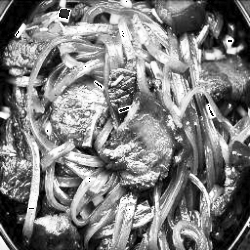

In [ ]:
green = cv2.equalizeHist(g)
cv2_imshow(green)

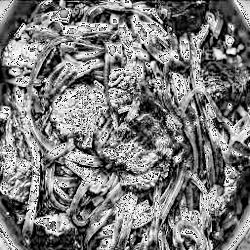

In [ ]:
blue= cv2.equalizeHist(b)
cv2_imshow(blue)

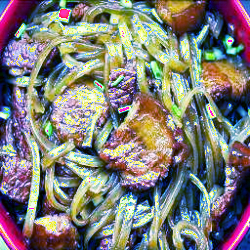

In [ ]:
image=cv2.merge((blue, green, red))
cv2_imshow(image)

In [ ]:
cv2.imwrite("result.jpg", image)

True

In [ ]:
 # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
model=VGG16()
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

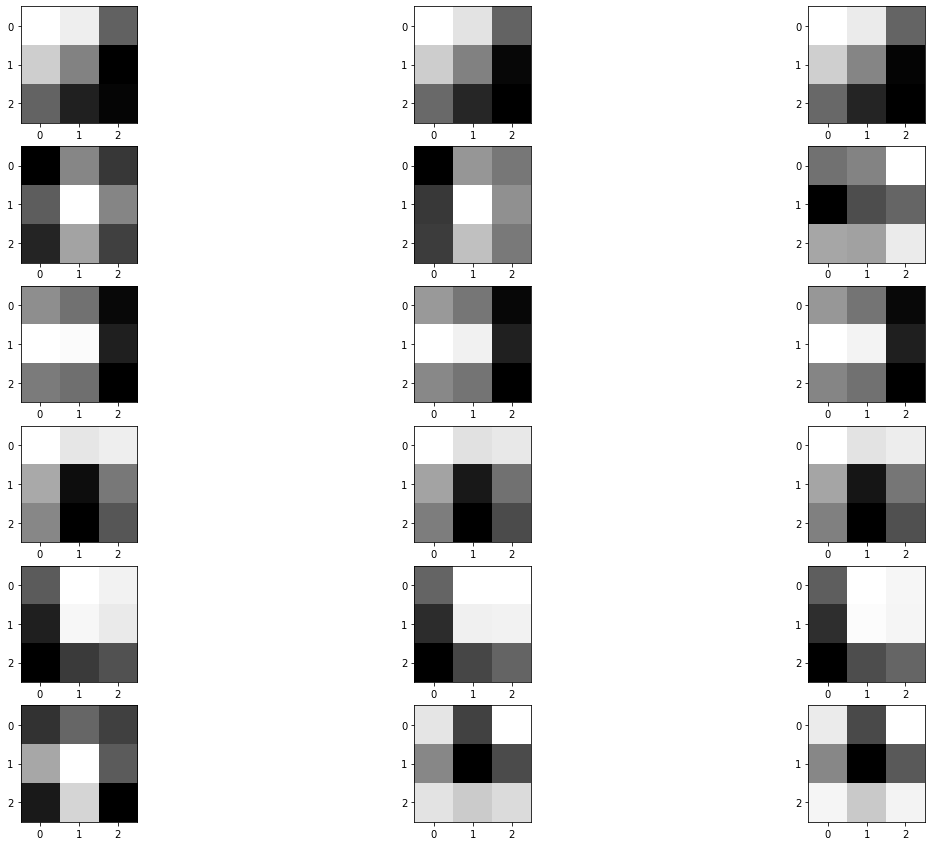

In [ ]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

In [ ]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [ ]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [ ]:
image = load_img("/content/result.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [ ]:
image = preprocess_input(image)

1/1 [==============================] - 0s 307ms/step


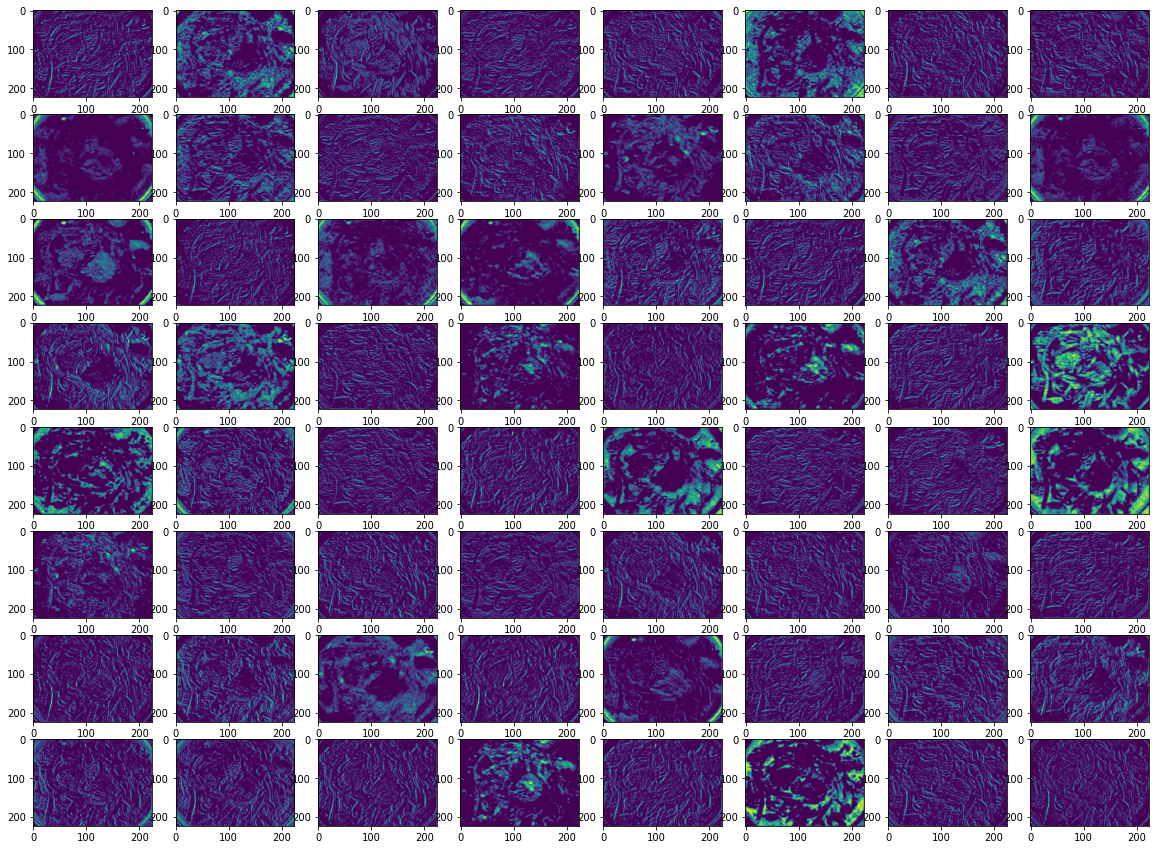

In [ ]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , aspect='auto')

pyplot.show()